# Pillow biblioteka

Pillow yra populiari Python biblioteka, leidžianti atlikti įvairias paveikslėlių manipuliacijas.

# Paveikslėlio dydžio keitimas (Resize)

In [ ]:
from PIL import Image

image = Image.open("paveiksliukas.jpg")

new_size = (width, height) # vietoje "width" ir "height" įrašykite norimus parametrus, pvz.: (60, 80)

resized_image = image.resize(new_size)

resized_image.save("paveiksliukas_resized.jpg")

# Paveikslėlio apkarpymas (Crop)



In [ ]:
from PIL import Image

image = Image.open("paveiksliukas.jpg")

crop_area = (left, upper, right, lower) # įrašykite norimus parametrus, pvz.: (100, 100, 300, 200)

cropped_image = image.crop(crop_area)

cropped_image.save("paveiksliukas_cropped.jpg")

# Paveikslėlio miniatiūrų kūrimas (Thumbnails)



In [ ]:
image = Image.open("paveiksliukas.jpg")

thumbnail_size = (width, height)

image.thumbnail(thumbnail_size)

image.save("paveiksliukas_thumbnail.jpg")

# Išskaidymas pikseliais ir surinkimas atgal

Paveikslėliai kompiuteryje dažniausiai saugomi naudojant RGB spalvų modelį, kuriame kiekviena spalva sudaryta iš trijų pagrindinių spalvų sudedamųjų dalių: raudonos (R), žalios (G) ir mėlynos (B). Šis pavyzdys atskleidžia, kaip galite atskirti šias spalvų sudedamąsias dalis ir sujungti jas atgal į vieną paveikslėlį.



In [ ]:
from PIL import Image

def split_and_merge(image):
    image_r, image_g, image_b = image.split()
    merged_image = Image.merge("RGB", (image_r, image_g, image_b))
    return merged_image

image = Image.open("paveiksliukas.jpg")
merged_image = split_and_merge(image)
merged_image.save("paveiksliukas_merged.jpg")

image.split() funkcija išskaido paveikslėlį į tris atskirus kanalus: raudoną (R), žalią (G) ir mėlyną (B). Šie kanalai yra atskiri paveikslėliai, kuriuose saugoma tik vienos spalvos sudedamoji dalis.
Po išskaidymo, image_r, image_g ir image_b kintamieji saugo atitinkamai raudoną, žalią ir mėlyną spalvų sudedamąsias dalis.
Tada naudojame Image.merge("RGB", (image_r, image_g, image_b)) funkciją, kuri sujungia raudoną, žalią ir mėlyną spalvų sudedamąsias dalis atgal į vieną paveikslėlį. "RGB" reiškia, kad norime sujungti spalvas pagal RGB modelį.

 Galite sukurti spalvų filtrą, pritaikant tam tikrą funkciją prie kiekvieno kanalo pikselių. Šiame pavyzdyje mes sukursime paprastą spalvų filtrą, padidinsime raudonos spalvos intensyvumą, sumažinsime žalios spalvos intensyvumą ir paliksime mėlynos spalvos intensyvumą nepakitę:

In [ ]:
from PIL import Image

def apply_color_filter(image_r, image_g, image_b):
    # Padidiname raudonos spalvos intensyvumą
    image_r = image_r.point(lambda i: i * 1.5)

    # Sumažiname žalios spalvos intensyvumą
    image_g = image_g.point(lambda i: i * 0.5)

    # Paliekame mėlynos spalvos intensyvumą nepakitę
    image_b = image_b.point(lambda i: i)

    return image_r, image_g, image_b

def split_and_merge(image):
    image_r, image_g, image_b = image.split()
    image_r, image_g, image_b = apply_color_filter(image_r, image_g, image_b)
    merged_image = Image.merge("RGB", (image_r, image_g, image_b))
    return merged_image

image = Image.open("paveiksliukas.jpg")
merged_image = split_and_merge(image)
merged_image.save("paveiksliukas_filtered.jpg")

Šiame pavyzdyje mes išskaidome paveikslėlį į RGB kanalus, pritaikome spalvų filtrą naudojant apply_color_filter funkciją, tada sujungėme atnaujintus kanalus į vieną paveikslėlį. Dėl šio pakeitimo paveikslėlyje matysite, kad raudona spalva yra ryškesnė, žalia spalva yra šviesesnė, o mėlyna spalva išlieka nepakitusi.

# Filtrai

Pillow turi įvairių integruotų efektų, kuriuos galite pritaikyti prie savo paveikslėlių. Jie yra pasiekiami per ImageFilter klasę.





In [ ]:
image = Image.open("paveiksliukas.jpg")
blurred_image = image.filter(ImageFilter.BLUR)
blurred_image.save("paveiksliukas_blurred.jpg")
from PIL import Image, ImageFilter

image = Image.open("paveiksliukas.jpg")
contour_image = image.filter(ImageFilter.CONTOUR)
contour_image.save("paveiksliukas_contour.jpg")
from PIL import Image, ImageFilter

image = Image.open("paveiksliukas.jpg")
sharpen_image = image.filter(ImageFilter.SHARPEN)
sharpen_image.save("paveiksliukas_sharpen.jpg")

# Daugiau informacijos apie įvairius efektus galite rasti Pillow dokumentacija.

# Išsaugojimas



In [ ]:
from PIL import Image

# Atidarome paveikslėlį
image = Image.open("paveiksliukas.jpg")

# Atlikite norimas manipuliacijas su paveikslėliu
# ... (manipuliacijų kodas čia)

# Išsaugokite paveikslėlį nurodytu pavadinimu ir formatu
image.save("paveiksliukas_edited.png", "PNG")

# Klasės darbas/aiškinimas

In [1]:
from  PIL  import Image

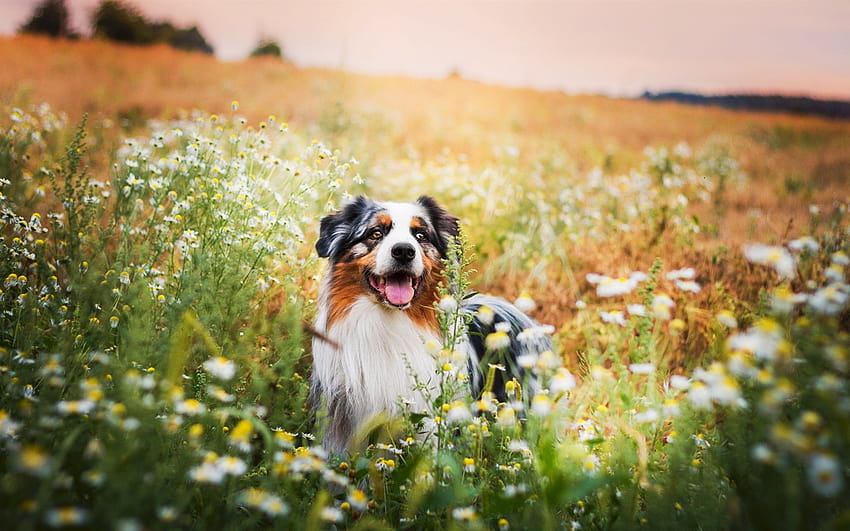

In [2]:
doggy = Image.open("IMG/dog2.jpg")

doggy

In [3]:
doggy.size

(850, 531)

In [4]:
new_size = (doggy.size[0]//2, doggy.size[1]//2)
new_size

(425, 265)

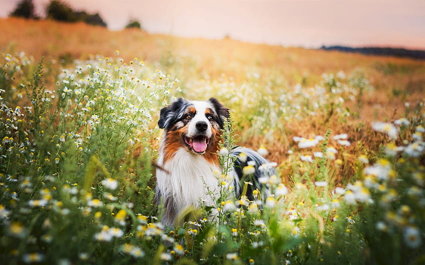

In [5]:
small_doggy = doggy.resize(new_size)
small_doggy

In [38]:
left_x = 260
left_y = 100
right_x = doggy.size[0] - 200
right_y = doggy.size[1] - 30

crop_box = (left_x, left_y, right_x, right_y)
print(crop_box)

# doggy.size[0] - doggy.size[0//3*2]

(260, 100, 650, 501)


(390, 401)


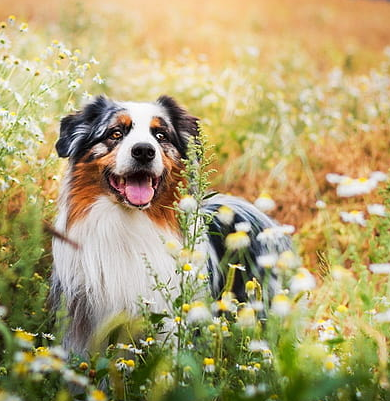

In [39]:
boxed_doggy = doggy.crop(crop_box)
print(boxed_doggy.size)
boxed_doggy

In [19]:
thumb_doggy = boxed_doggy.copy()
thumb_size = 64, 64
thumb_doggy.thumbnail(thumb_size)
thumb_doggy


thumb_doggy.save("IMG/thumb_doggy.jpg")

In [45]:
doggy_brown, doggy_g, doggy_b = doggy.split()


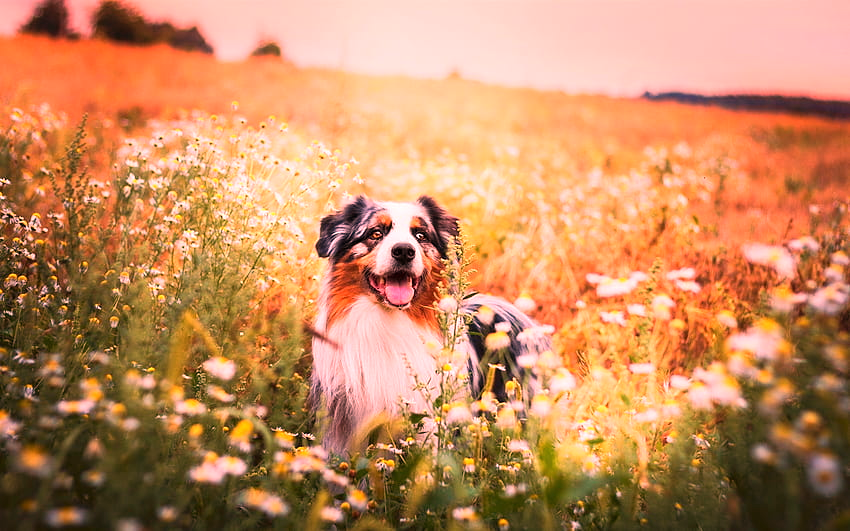

In [48]:
doggy_r = doggy_brown.point(lambda brown: brown * 1.5)
doggu_g = doggy_g.point(lambda green: green * 1.5)

desaturated_doggy = Image.merge("RGB", (doggy_r, doggy_g, doggy_b))
desaturated_doggy

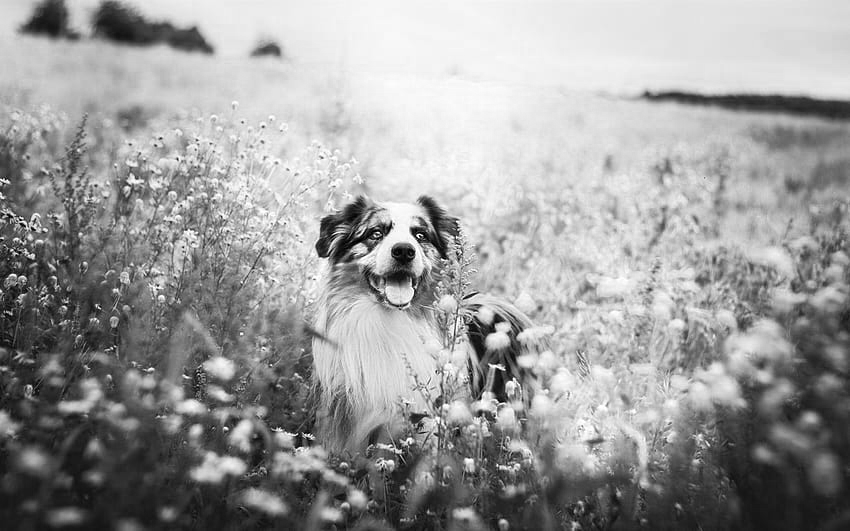

In [50]:
doggy_brown

In [97]:
# doggy_brown = doggy.getdata(0)
# doggy_greens = doggy.getdata(1)
# doggy_blues = doggy.getdata(2)
# for id , brown in enumerate(list(doggy_brown)[::10]):
#     print(doggy_brown[id], doggy_greens[id], doggy_blues[id])
# # list(doggy_brown)

In [65]:
from PIL import ImageFilter

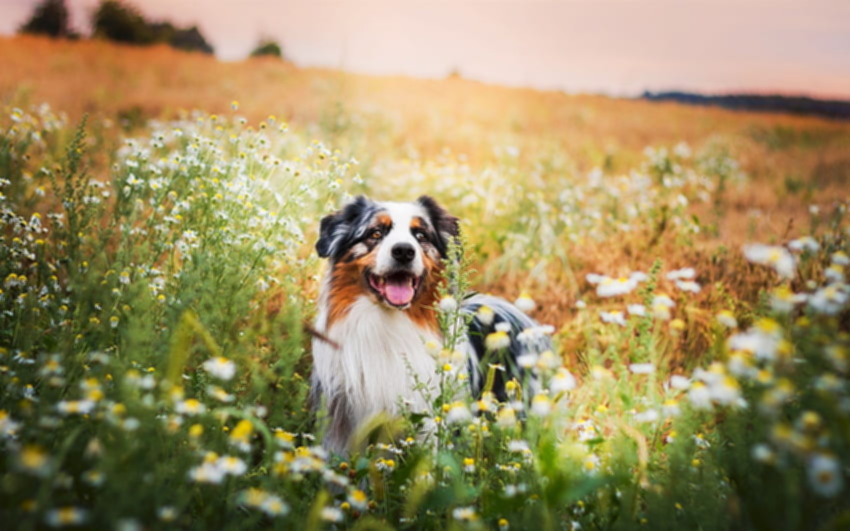

In [64]:
hazy_doggy = doggy.filter(ImageFilter.BoxBlur(1))
hazy_doggy

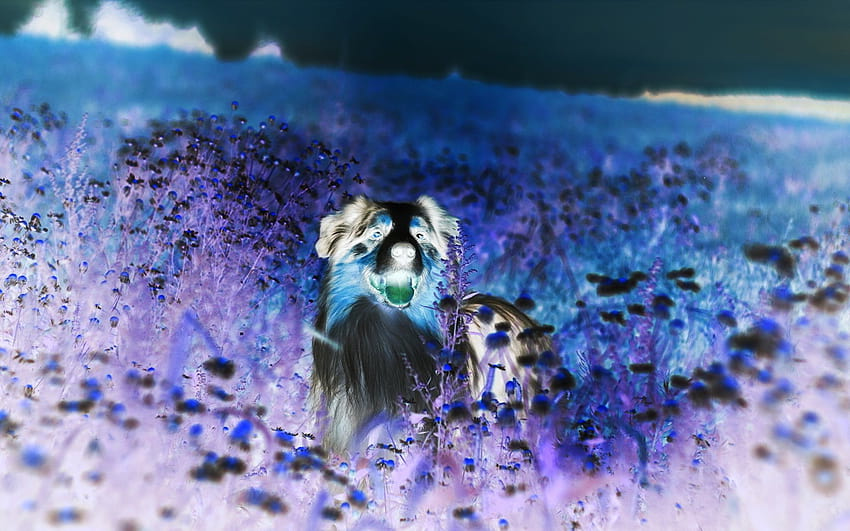

In [67]:
from PIL import ImageOps

ImageOps.invert(doggy)


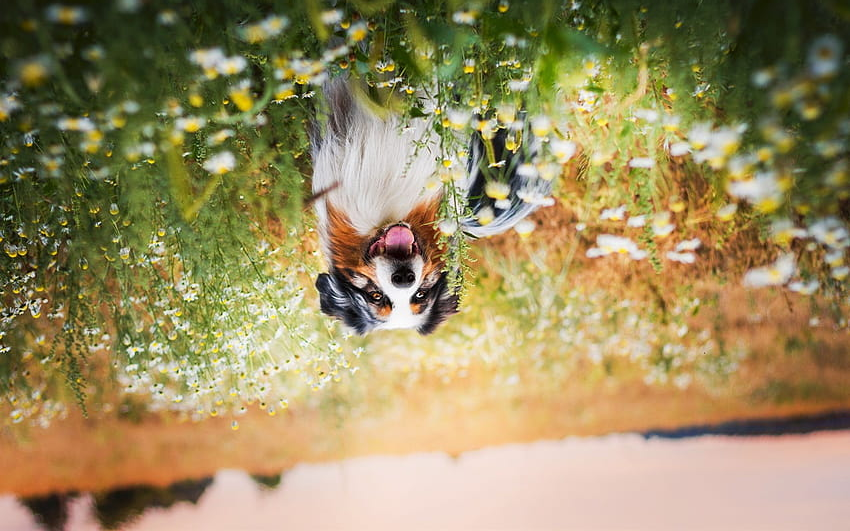

In [68]:
ImageOps.flip(doggy)

In [89]:
box_left = 0, 0, 250, 532
doggy_left = ImageOps.mirror(doggy).crop(box_left)

box_right = 400, 0, 400, 532
doggy_right = ImageOps.mirror(doggy).crop(box_right)

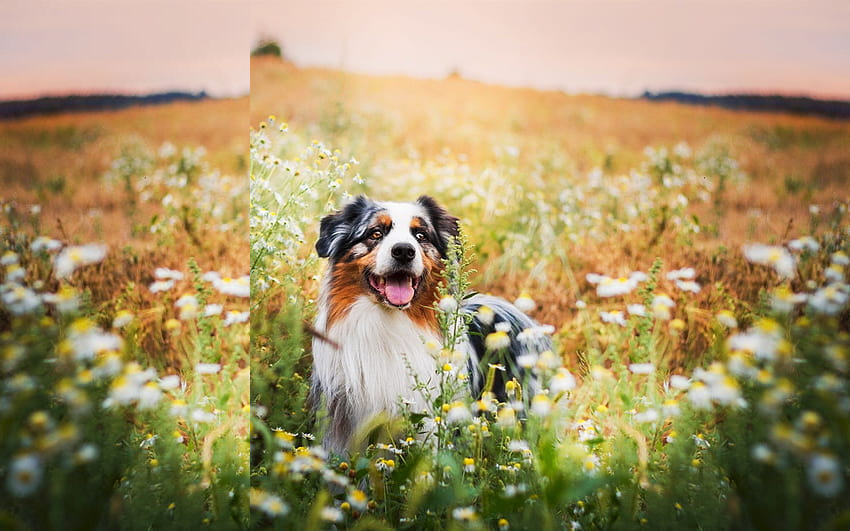

In [90]:
double_doggy = doggy.copy()
double_doggy.paste(doggy_left, (0, 0))
double_doggy

# Užduotys

Paimkite savo portreto nuotrauką, ją apkarpyti ir sumažinti taip, kad liktų graži maža kvadratinė ikonėlė 128x128.

Padarykite savo ikėlę juodai baltą

Ant savo portreto dešinėje viršuje uždėkite permatomą png logotipą kompanijos, kuri Jums patinka.


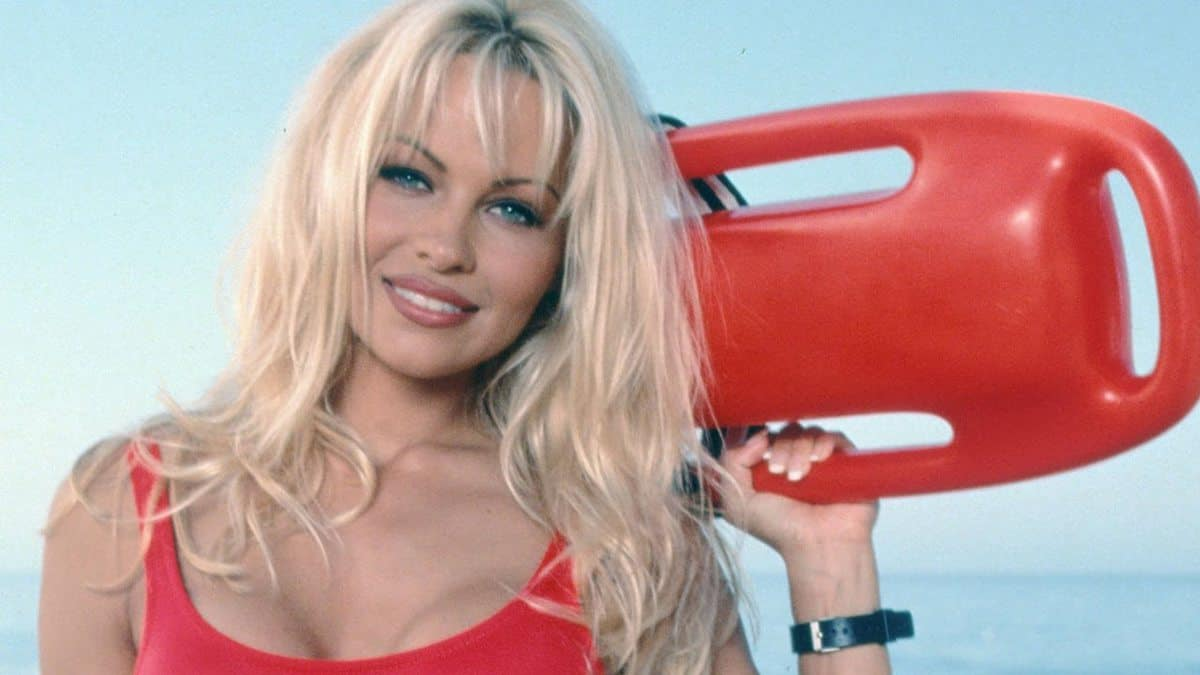

In [133]:
from PIL import Image

pamela = Image.open("IMG/Pamela.jpg")
pamela

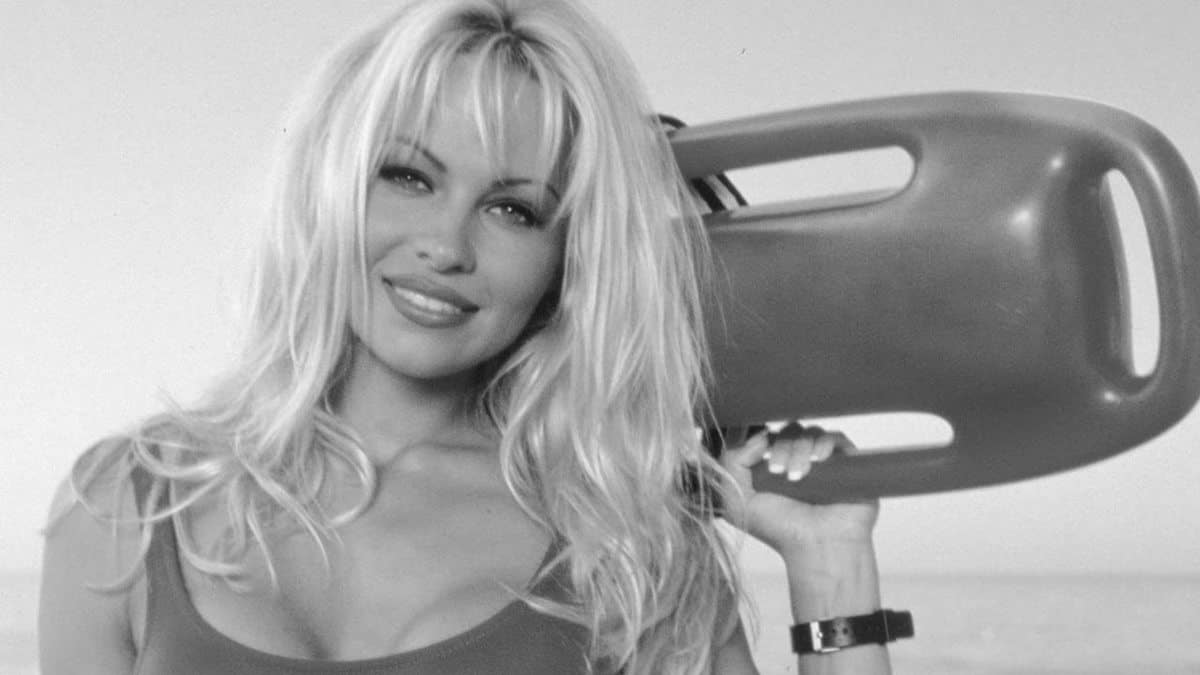

In [135]:
pamela_bw = pamela.convert('L')
pamela_bw

In [167]:
new_size = (int(pamela.size[1]//5.26), int(pamela.size[1]//5.26))
new_size


(128, 128)

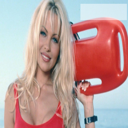

In [168]:
small_pamela = pamela.resize(new_size)
small_pamela

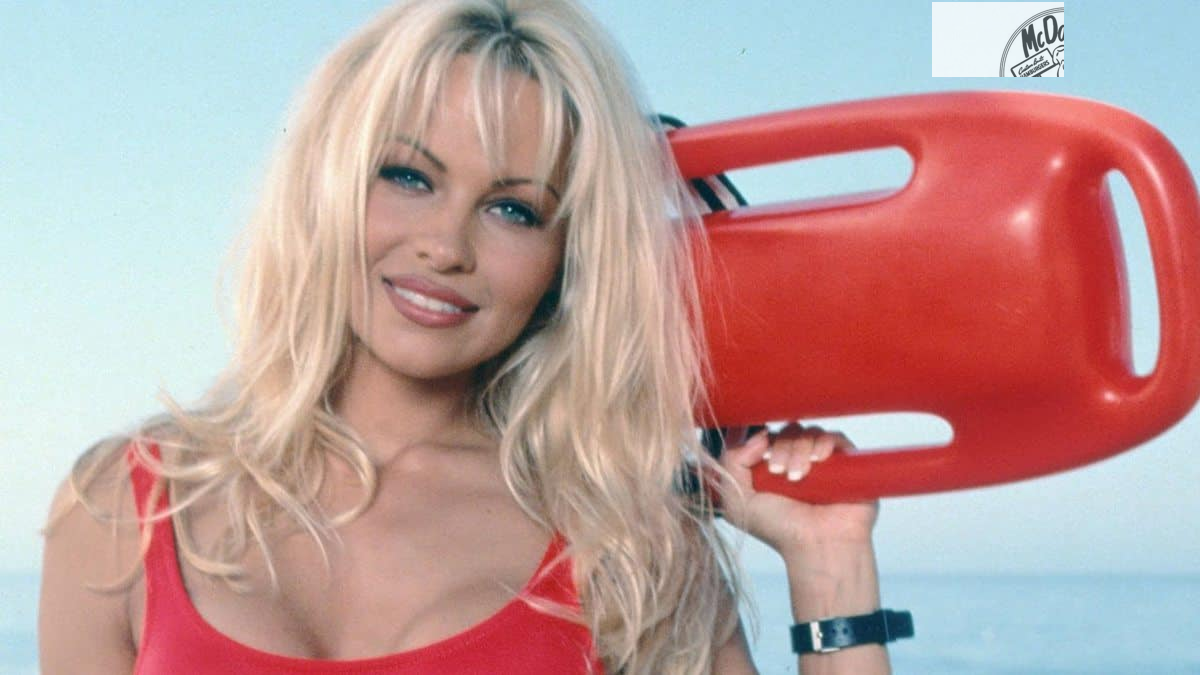

In [274]:
pamela = Image.open("IMG/Pamela.jpg").convert("RGBA")
logo = Image.open("IMG/mc2.jpg").convert("RGBA")

logo = logo.resize((logo.size[0] // 2, logo.size[1] // 2))
alpha = Image.new("L", logo.size)
alpha_x = logo.size[0] - 1 - logo.size[0] // 1
alpha_y = 1

alpha.paste(120, box=(alpha_x, alpha_y, alpha_x + logo.size[0] // 2, alpha_y + logo.size[1] // 2))
logo.putalpha(alpha)

x = pamela.size[0] - logo.size[0] - 1
y = 1
pamela.paste(logo, (x, y), logo)

pamela.alpha_composite(logo, (x, y))
pamela

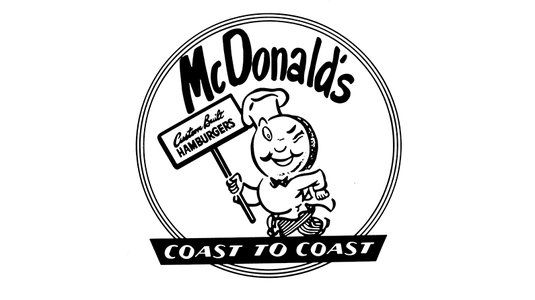

In [275]:
logo = Image.open("IMG/mc2.jpg")
logo